In [ ]:
# sce_10x = readRDS("/hps/nobackup/stegle/users/acuomo/singlecell_endodiff/10x/sce_10x_day0.rds")
# sce_10x = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/sce_10x_donorid_qc.rds")

In [12]:
# load 10x sceset
sce_10x = readRDS("/hps/nobackup/stegle/users/acuomo/singlecell_endodiff/2019/sce_10x_day0.rds")
sce_10x_day0 = sce_10x[,sce_10x$day == 'day0']
sce_10x_day0_donor = sce_10x_day0[,sce_10x_day0$experiment != "unknown"]
sce_10x_day0_donor

class: SingleCellExperiment 
dim: 20356 15168 
metadata(0):
assays(1): counts
rownames(20356): ENSG00000186092 ENSG00000237683 ... ENSG00000198695
  ENSG00000198727
rowData names(2): id symbol
colnames: NULL
colData names(6): dataset barcode ... donor_long_id experiment
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [15]:
donors_10x = unique(sce_10x_day0_donor$donor_long_id)
donors_10x

[1] "HPSI0614i-lepk_1" "HPSI0314i-cuhk_2" "HPSI0613i-ueah_1" "HPSI0613i-hegp_3"
 [5] "HPSI0713i-veku_2" "HPSI0713i-cicb_2" "HPSI0114i-eipl_1" "HPSI0614i-uilk_2"
 [9] "HPSI0514i-yelp_3" "HPSI0614i-qunz_3" "HPSI1014i-kefb_1" "HPSI0414i-tout_1"
[13] "HPSI0714i-pipw_5" "HPSI0115i-aoxv_3" "HPSI1213i-pahc_4" "HPSI0514i-toco_5"
[17] "HPSI0914i-jejf_2" "HPSI0115i-melw_2" "HPSI0414i-xojn_3" "HPSI1113i-hayt_1"
[21] "HPSI1014i-eesb_1" "HPSI0214i-pelm_3" "HPSI1014i-nosn_6" "HPSI0114i-zapk_3"
[25] "HPSI0314i-hoik_1" "HPSI1014i-juuy_2" "HPSI0914i-qehq_3" "HPSI1013i-kuxp_1"
[29] "HPSI0215i-yoch_6"

In [1]:
# load SmartSeq2 sceset
# sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [6]:
# sce_0 = sce[,sce$day == 'day0']
sce_0

class: SingleCellExperiment 
dim: 11231 9661 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(9661): 21672_1#101 21672_1#102 ... 24475_8#96 24475_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [17]:
sce_0_10xdonors = sce_0[,sce_0$donor_long_id %in% donors_10x]
sce_0_10xdonors

class: SingleCellExperiment 
dim: 11231 2275 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(2275): 21672_1#101 21672_1#105 ... 24086_8#86 24086_8#88
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [18]:
get_sums <- function(sce, assay, ngenes, ndonors){
    sums <- matrix(0,nrow = ngenes, ncol = ndonors)
    for (i in 1:ndonors){
        d = assay[,sce$donor_long_id==unique(sce$donor_long_id)[i]]
        sums[,i] = rowSums(d)
        }
    rownames(sums) = rownames(sce)
    colnames(sums) = unique(sce$donor_long_id)
    sums
}

In [19]:
pseudobulk_ss2 <- get_sums(sce_0_10xdonors, counts(sce_0_10xdonors), 
                           nrow(sce_0_10xdonors), length(unique(sce_0_10xdonors$donor_long_id)))

In [20]:
pseudobulk_ss2[1:5,1:5]

,HPSI0114i-zapk_3,HPSI0214i-pelm_3,HPSI0414i-tout_1,HPSI0314i-cuhk_2,HPSI0613i-hegp_3
ENSG00000000003_TSPAN6,11840.9408,11889.6832,6938.9394,2417.00012,1538.96407
ENSG00000000419_DPM1,14535.6590,15187.9292,7825.4024,2106.02342,1432.27696
ENSG00000000457_SCYL3,210.1264,299.5744,162.5295,67.52786,32.43822
ENSG00000000460_C1orf112,2604.2899,2549.4794,1507.9749,427.48620,326.36765
ENSG00000001036_FUCA2,4395.8593,5212.3862,2941.7979,938.19330,571.44105


In [22]:
library(ggplot2)

In [23]:
df = data.frame(donor = colnames(pseudobulk_ss2), total_reads = colSums(pseudobulk_ss2))
head(df,2)

,donor,total_reads
HPSI0114i-zapk_3,HPSI0114i-zapk_3,120607330
HPSI0214i-pelm_3,HPSI0214i-pelm_3,112789553


In [27]:
pseudobulk_10x <- get_sums(sce_10x_day0_donor, counts(sce_10x_day0_donor), 
                           nrow(sce_10x_day0_donor), length(unique(sce_10x_day0_donor$donor_long_id)))

In [28]:
df1 = data.frame(donor = colnames(pseudobulk_10x), total_reads = colSums(pseudobulk_10x))
head(df1,2)

,donor,total_reads
HPSI0614i-lepk_1,HPSI0614i-lepk_1,8192654
HPSI0314i-cuhk_2,HPSI0314i-cuhk_2,13504622


In [59]:
mean(df$total_reads)/1000000
mean(df1$total_reads)/1000000
median(df$total_reads)/1000000
median(df1$total_reads)/1000000

[1] 45.72628

[1] 11.78168

[1] 36.25855

[1] 9.287997

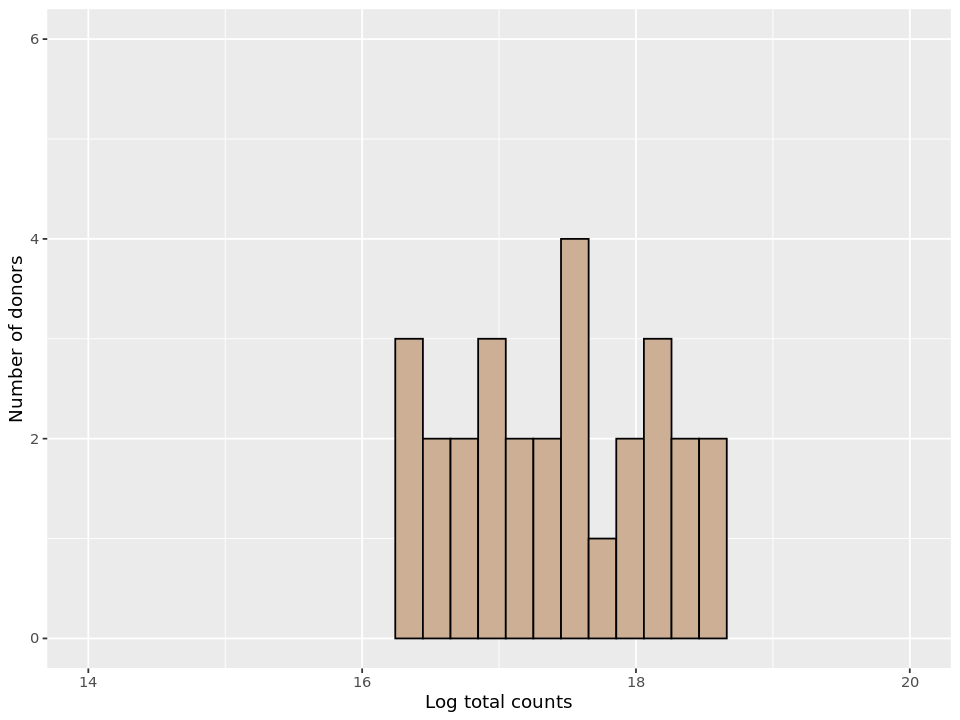

In [56]:
ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 1, col = "black", bins = 12, fill = "peachpuff3") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(14, 20), ylim = c(0,6)) 

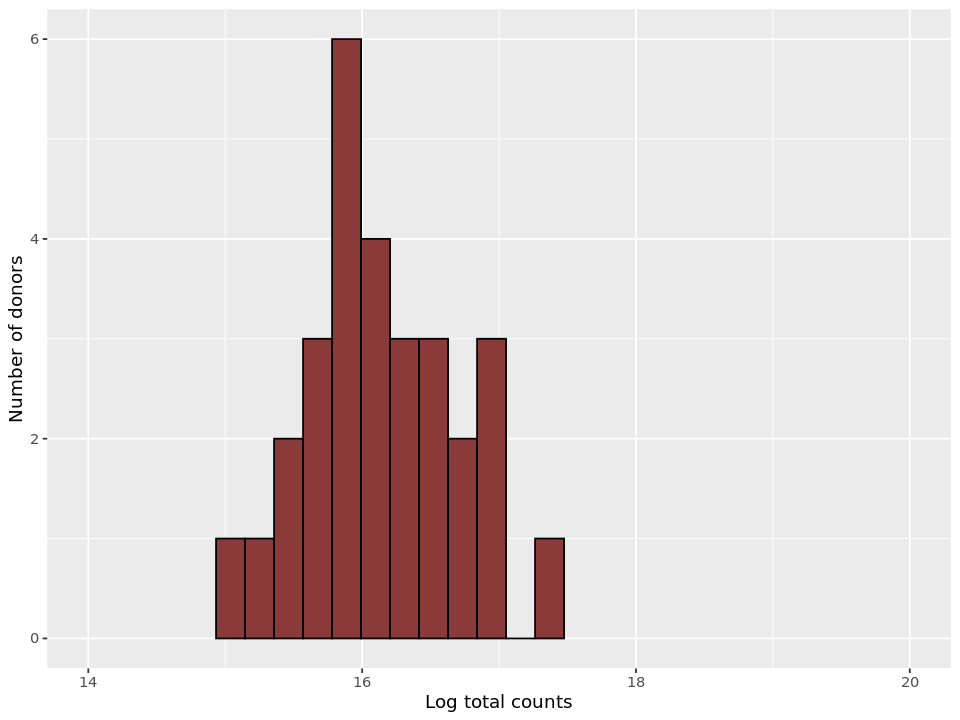

In [55]:
ggplot(df1, aes(x=log(total_reads))) + geom_histogram(alpha = 1, col = "black", bins = 12, fill = "indianred4") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(14, 20), ylim = c(0,6))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


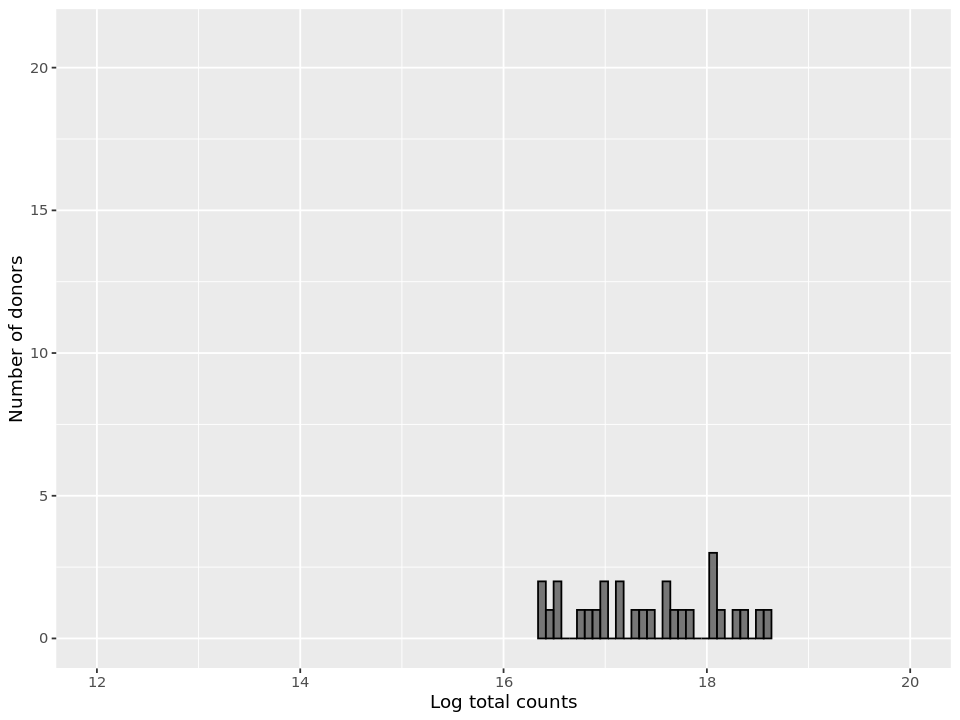

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 0.8, col = "black") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(12, 20), ylim = c(0,21))

In [26]:
table(sce_0_10xdonors$donor)


aoxv cicb cuhk eesb eipl hayt hegp hoik jejf juuy kefb kuxp lepk melw nosn pahc 
  68   42   41   66   99   41   22   32  107  132   67   84   35  101   73   61 
pelm pipw qehq qunz toco tout ueah veku xojn yelp yoch zapk 
 222  111  115   82   29  127   23   22   27  174   58  214 

In [22]:
sce1 = sce_0[,sce_0$donor !="tavh"]
ncells = 10
cells_sel = c()
for (donor in unique(sce1$donor)){
#     print(donor)
#     print(ncells)
    sce = sce1[,sce1$donor == donor]
    cells_sel = unique(c(cells_sel, colnames(sce)[sample(ncol(sce),ncells)]))
}
length(cells_sel)

[1] 1100

In [24]:
pseudobulk <- get_sums(sce_0[,cells_sel], counts(sce_0[,cells_sel]), 
                       nrow(sce_0[,cells_sel]), length(unique(sce_0[,cells_sel]$donor_long_id)))

In [25]:
df = data.frame(donor = colnames(pseudobulk), total_reads = colSums(pseudobulk))
head(df,2)

,donor,total_reads
HPSI0114i-zapk_3,HPSI0114i-zapk_3,4857192
HPSI0214i-wibj_2,HPSI0214i-wibj_2,5231791


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


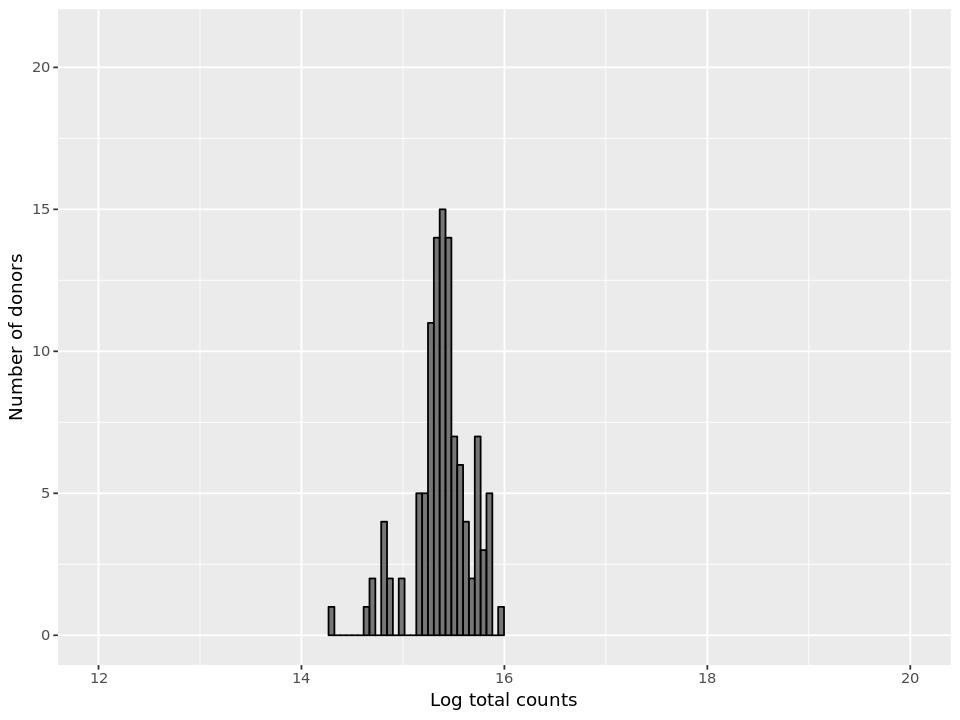

In [27]:
ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 0.8, col = "black") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(12, 20), ylim = c(0,21))

In [37]:
df1 = data.frame(gene = as.character(rownames(pseudobulk)), avg_expr = rowMeans(pseudobulk))
df1 = df1[order(df1$avg_expr),]
head(df1,3)
tail(df1,3)

,gene,avg_expr
ENSG00000147223_RIPPLY1,ENSG00000147223_RIPPLY1,0.1405789
ENSG00000197353_LYPD2,ENSG00000197353_LYPD2,0.4208545
ENSG00000106038_EVX1,ENSG00000106038_EVX1,0.9340999


,gene,avg_expr
ENSG00000205542_TMSB4X,ENSG00000205542_TMSB4X,535304.3
ENSG00000198804_MT-CO1,ENSG00000198804_MT-CO1,544740.2
ENSG00000198938_MT-CO3,ENSG00000198938_MT-CO3,775587.2


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


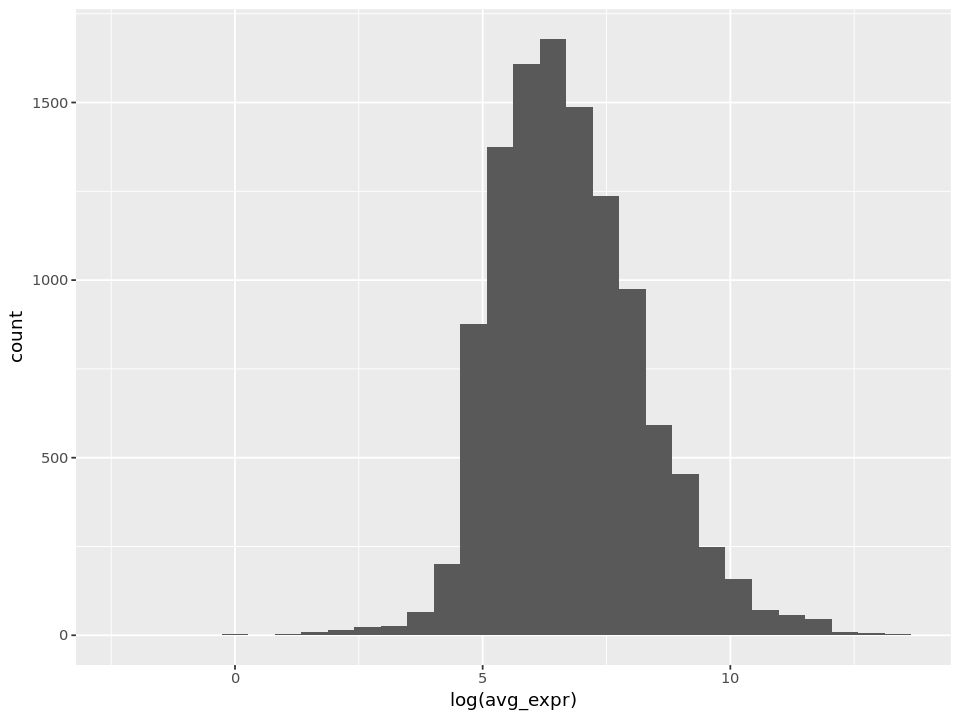

In [38]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(df1, aes(x=log(avg_expr))) + geom_histogram()

In [50]:
df_quant = data.frame(percentile = c(0,25,50,75,100), expr = quantile(log(df1$avg_expr)))
df_quant$expr

[1] -1.961986  5.691677  6.606282  7.680283 13.561376

In [75]:
plist = list()
for (i in 1:nrow(df_quant)){
    gene = as.character(df1[abs(log(df1$avg_expr) - df_quant[i,"expr"])<0.001,"gene"][1])
    df = data.frame(donor = colnames(pseudobulk), expr = pseudobulk[gene,])
    p = ggplot(df, aes(x=log(expr))) + geom_histogram(alpha = 0.8, col = "black") + ggtitle(gene)
    plist[[i]] = p + xlab("Log total expression") + ylab("Number of donors")
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 108 rows containing non-finite values (stat_bin).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

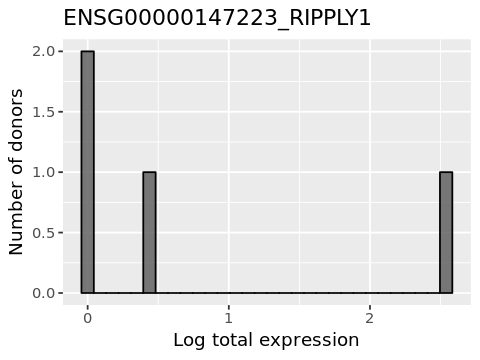

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


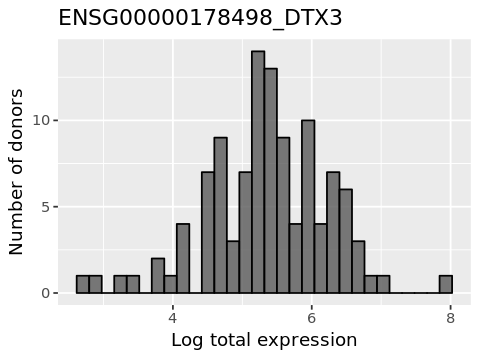

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


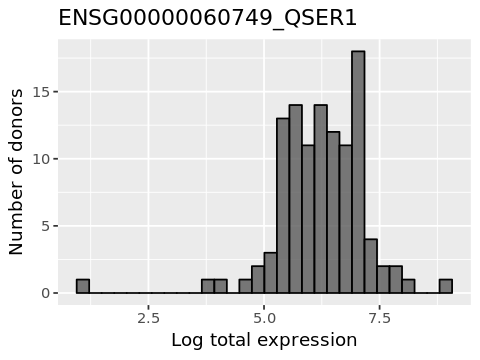

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


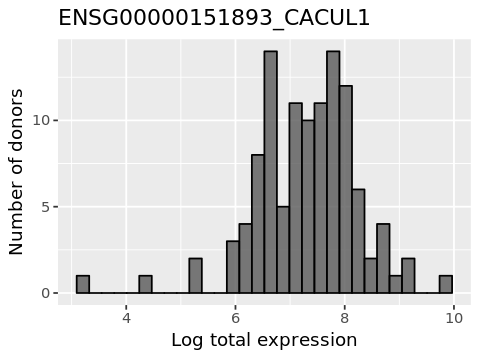

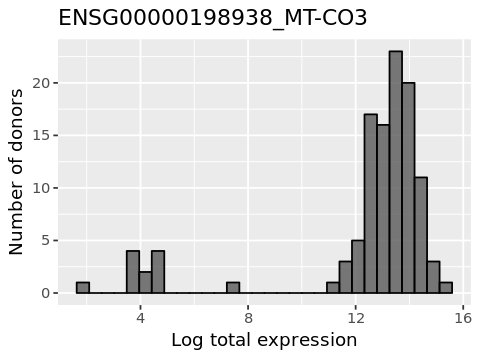

In [76]:
options(repr.plot.width = 4, repr.plot.height = 3)
for (i in 1:nrow(df_quant)){
    print(plist[[i]])
}

In [8]:
pca = prcomp(t(logcounts(sce_0)))

In [20]:
df = as.data.frame(cbind(pca$x[,1:2], colData(sce_0)[,c("experiment", "donor_short_id")]))
head(df,2)

,PC1,PC2,experiment,donor_short_id
21672_1#101,16.546141,-6.675129,expt_12,zapk_3
21672_1#102,-0.737448,-3.787014,expt_12,wibj_2


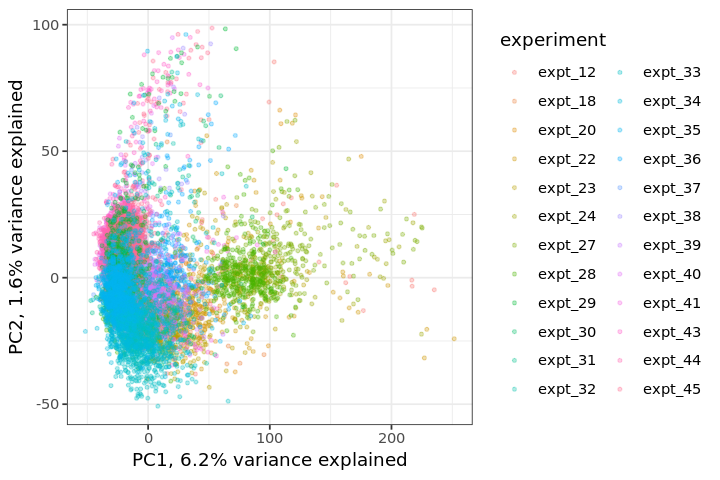

In [22]:
perc_var <- round(summary(pca)$importance[2,]*100, 1)
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = experiment)) + 
        geom_point(alpha = 0.3, size = 0.8) + 
#         scale_color_canva(palette = "Pool party") +
        theme_bw() + #theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))